In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("image/Bricks_2.jpg")

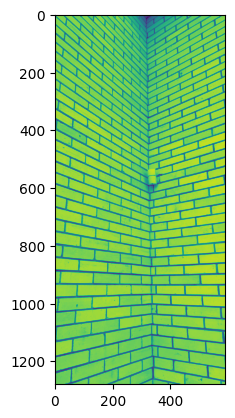

In [4]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

In [5]:
image_res ,image_thresh = cv2.threshold(img_gray,60,80,cv2.THRESH_BINARY)

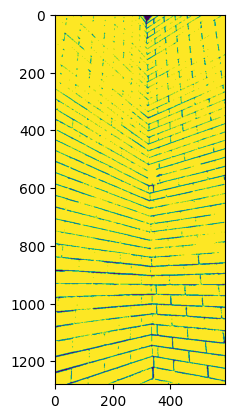

In [6]:
plt.imshow(image_thresh)


In [7]:
kernel = np.ones((3,3),np.uint8)

In [8]:
opening = cv2.morphologyEx(image_thresh,cv2.MORPH_OPEN,kernel) 

In [9]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, last_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
last_image = np.uint8(last_image)

In [10]:
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [11]:
def display(img,count,cmap="gray"):
    f_image = cv2.imread("image/Bricks_2.jpg")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total count = {}".format(count))

for (i, c) in enumerate(cnts):
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(image, "#{}".format(i + 1), (int(x) - 45, int(y)+20),
		cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

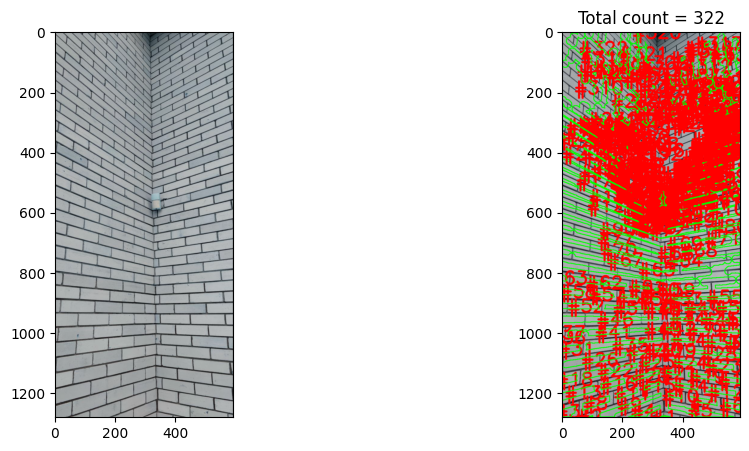

In [12]:
display(image,len(cnts))